## Import Libraries

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

## Step1: Data Reading

In [2]:
# Read the csv file and create the data frame
df_leads = pd.read_csv('Leads.csv')

In [3]:
# Read the head
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step2: Data Inspecting

In [4]:
# get the data frame info
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
# check for null values count in all the columns 
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
#check the percentage of missing values in all the columns
round(100 * (df_leads.isnull().sum()/len(df_leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [7]:
df_leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Setp 3: Data Cleaning

In [8]:
# Drop the unecessary columns
# We don't need Prospect ID and Lead number as they are just identity numbers
df_cleanleads = df_leads.drop(['Prospect ID'], axis = 1)

In [9]:
df_cleanleads[['Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Activity Score',
               'Asymmetrique Profile Score']].head()

,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score
0,02.Medium,02.Medium,15.0,15.0
1,02.Medium,02.Medium,15.0,15.0
2,02.Medium,01.High,14.0,20.0
3,02.Medium,01.High,13.0,17.0
4,02.Medium,01.High,15.0,18.0


In [10]:
# Dropping the activity and profile scores as we already have the activity and profile index columns which have the categories
# like Low,medium and high so that we can create dummy variables with them
df_cleanleads = df_cleanleads.drop(['Asymmetrique Activity Score','Asymmetrique Profile Score'], axis = 1)

In [11]:
#Asymmetrique Activity Index
df_cleanleads['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [12]:
df_cleanleads = df_cleanleads.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index'], axis = 1)

In [13]:
# Find the value counts for 'Do Not CAll' column
df_cleanleads['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [14]:
# Drop 'Do Not Call' as we most of the values are 'NO' and only 2 values are Yes
df_cleanleads = df_cleanleads.drop(['Do Not Call'], axis = 1)

In [15]:
# Find the value counts for 'Do Not EMail' column
df_cleanleads['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [16]:
round((len(df_cleanleads[df_cleanleads['Do Not Email'] == 'Yes'].Converted)/len(df_cleanleads[df_cleanleads['Do Not Email'] == 'No'].Converted))*100,2)

8.63

In [17]:
# Drop 'DO Not Email' as the imbalance ratio is low
df_cleanleads =df_cleanleads.drop(['Do Not Email'], axis = 1)

In [18]:
# Find the value counts for magazine column
df_cleanleads.Magazine.value_counts()

No    9240
Name: Magazine, dtype: int64

In [19]:
# Drop magazine as we only have 'NO' value in it
df_cleanleads = df_cleanleads.drop(['Magazine'], axis = 1)

In [20]:
# Find the value counts for magazine column
df_cleanleads['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [21]:
# Drop 'Newspaper Article' as we only have two 'Yes' values and all other values are 'NO'
df_cleanleads = df_cleanleads.drop(['Newspaper Article'], axis = 1)

In [22]:
# Find the value counts for 'X Education Forums' column
df_cleanleads['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [23]:
# Drop 'X Education Forums' as we only have one 'Yes' value and all other values are 'NO'
df_cleanleads = df_cleanleads.drop(['X Education Forums'], axis = 1)

In [24]:
# Find the value counts for 'What matters most to you in choosing a course' column
df_cleanleads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [25]:
# Drop 'What matters most to you in choosing a course' as we only have negligible value for other categories 
# and all values are set to 'Better Career Prospects'
df_cleanleads = df_cleanleads.drop(['What matters most to you in choosing a course'], axis = 1)

In [26]:
# Find the value counts for 'Newspaper' column
df_cleanleads['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [27]:
# Drop 'Newspaper' as we have only one 'Yes' value and all other values are set to'NO'
df_cleanleads = df_cleanleads.drop(['Newspaper'], axis = 1)

In [28]:
# Find the value counts for 'Page Views Per Visit' column
df_cleanleads['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [29]:
# Drop 'Digital Advertisement' as we have only one 'Yes' value and all other values are set to'NO'
df_cleanleads = df_cleanleads.drop(['Digital Advertisement'], axis = 1)

In [30]:
# Find the value counts for 'Through Recommendations' column
df_cleanleads['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [31]:
# Drop 'Through Recommendations' as we have very negligible 'Yes' values and all other values are set to'NO'
df_cleanleads = df_cleanleads.drop(['Through Recommendations'], axis = 1)

In [32]:
# Find the value counts for 'Receive More Updates About Our Courses' column
df_cleanleads['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [33]:
# Drop 'Receive More Updates About Our Courses' as we have 'NO' values only
df_cleanleads = df_cleanleads.drop(['Receive More Updates About Our Courses'], axis = 1)

In [34]:
# Find the value counts for 'Update me on Supply Chain Content' column
df_cleanleads['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [35]:
# Drop 'Update me on Supply Chain Content' as all the values are 'NO'
df_cleanleads = df_cleanleads.drop(['Update me on Supply Chain Content'], axis = 1)

In [36]:
# Find the value counts for 'Get updates on DM Content' column
df_cleanleads['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [37]:
# Drop 'Get updates on DM Content' as all the values are 'NO' 
df_cleanleads = df_cleanleads.drop(['Get updates on DM Content'], axis = 1)

In [38]:
df_cleanleads.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [39]:
# Drop 'Get updates on DM Content' as all the values are 'NO' 
df_cleanleads = df_cleanleads.drop(['City'], axis = 1)

In [40]:
df_cleanleads.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Canada                     4
Germany                    4
Nigeria                    4
South Africa               4
Kuwait                     4
Sweden                     3
Belgium                    2
Bangladesh                 2
Uganda                     2
Ghana                      2
Italy                      2
Asia/Pacific Region        2
Netherlands                2
China                      2
Philippines                2
Malaysia                   1
Sri Lanka                  1
Liberia                    1
Russia                     1
Denmark                    1
Tanzania                   1
Vietnam       

In [41]:
# Drop 'Get updates on DM Content' as all the values are 'NO' 
df_cleanleads = df_cleanleads.drop(['Country'], axis = 1)

In [42]:
# Find the value counts for 'I agree to pay the amount through cheque' column
df_cleanleads['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [43]:
# Drop 'I agree to pay the amount through cheque' as all the values are 'NO' 
df_cleanleads = df_cleanleads.drop(['I agree to pay the amount through cheque'], axis = 1)

In [44]:
df_cleanleads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
Lead Number                               9240 non-null int64
Lead Origin                               9240 non-null object
Lead Source                               9204 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9137 non-null object
Specialization                            7802 non-null object
How did you hear about X Education        7033 non-null object
What is your current occupation           6550 non-null object
Search                                    9240 non-null object
Tags                                      5887 non-null object
Lead Quality                              4473 non-null object
Lead Profile

In [45]:
# Find the value counts for 'I agree to pay the amount through cheque' column
df_cleanleads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
Resubscribed to emails             1
Form Submitted on Website          1
Approached upfront                 1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [46]:
df_cleanleads.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
Lead Number                               9240 non-null int64
Lead Origin                               9240 non-null object
Lead Source                               9204 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9137 non-null object
Specialization                            7802 non-null object
How did you hear about X Education        7033 non-null object
What is your current occupation           6550 non-null object
Search                                    9240 non-null object
Tags                                      5887 non-null object
Lead Quality                              4473 non-null object
Lead Profile

In [47]:
round(100 * (df_cleanleads.isnull().sum()/len(df_cleanleads.index)),2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            15.56
How did you hear about X Education        23.89
What is your current occupation           29.11
Search                                     0.00
Tags                                      36.29
Lead Quality                              51.59
Lead Profile                              29.32
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [48]:
# Replace all the 'Select' values with Null as select is a missing option in the data
for col in df_cleanleads.columns:
     df_cleanleads[col] = df_cleanleads[col].apply(lambda x: np.NaN if x == 'Select' else x)        

In [49]:
df_cleanleads = df_cleanleads[df_cleanleads.isnull().sum(axis = 1) <= 6]

In [50]:
df_cleanleads.shape

(9208, 17)

In [51]:
round(100 * (df_cleanleads.isnull().sum()/len(df_cleanleads.index)),2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.34
Converted                                  0.00
TotalVisits                                1.14
Total Time Spent on Website                0.00
Page Views Per Visit                       1.14
Last Activity                              0.88
Specialization                            36.36
How did you hear about X Education        78.39
What is your current occupation           29.14
Search                                     0.00
Tags                                      36.21
Lead Quality                              51.43
Lead Profile                              74.10
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [52]:
# removing columns 'How did you hear about X Education' and 'lead profile' columns as the % null values are more than 70
df_cleanleads = df_cleanleads.drop(['Lead Profile', 'How did you hear about X Education','Lead Quality'], axis = 1)

In [53]:
# Impute missing values for lead source with mode
df_cleanleads['Lead Source'].describe()

count       9177
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

In [54]:
# Impute missing values for lead source with Google, as it is the highest occurrence 
df_cleanleads['Lead Source'] = df_cleanleads['Lead Source'].apply(lambda x: 'Google' if (pd.isnull(x) == True) else x)

In [55]:
# Impute missing values for Total visits
df_cleanleads['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [56]:
# Impute missing values for lead source with mean 
df_cleanleads['TotalVisits'] = df_cleanleads['TotalVisits'].apply(lambda x: int(round(df_cleanleads['TotalVisits'].mean(),0)) if (pd.isnull(x) == True) else x)

In [57]:
# Impute missing values for Page Views Per Visit
df_cleanleads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [58]:
# Impute missing values for lead source with mean
df_cleanleads['Page Views Per Visit'] = df_cleanleads['Page Views Per Visit'].apply(lambda x: int(round(df_cleanleads['Page Views Per Visit'].mean(),0)) if (pd.isnull(x) == True) else x)

In [59]:
# Impute missing values for Last Activity with mode
df_cleanleads['Last Activity'].describe()

count             9127
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object

In [60]:
# Impute missing values for Last Activity with Google, as it is the highest occurrence 
df_cleanleads['Last Activity'] = df_cleanleads['Last Activity'].apply(lambda x: 'Email Opened' if (pd.isnull(x) == True) else x)

In [61]:
# Impute missing values for Specialization
df_cleanleads['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [62]:
# Null values are having highest frequency, hence we cannot replace null values with mode or any thing else
# Hence we can replace the null value with a new category called Unspecified
df_cleanleads['Specialization'] = df_cleanleads['Specialization'].apply(lambda x: 'Unspecified' if (pd.isnull(x) == True) else x)

In [63]:
df_cleanleads['Specialization'].describe()

count            9208
unique             19
top       Unspecified
freq             3348
Name: Specialization, dtype: object

In [64]:
# Impute missing values for What is your current occupation
df_cleanleads['What is your current occupation'].value_counts()

Unemployed              5575
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [65]:
# Missing values for current occupation column are having unemployed, hence replacing with unemployed
df_cleanleads['What is your current occupation'] = df_cleanleads['What is your current occupation'].apply(lambda x: 'Unemployed' if (pd.isnull(x) == True) else x)

In [66]:
# Impute missing values for Tags column
df_cleanleads['Tags'].describe()

count                                    5874
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [67]:
# Drop tags column as there are many categories in this column and there are many missing values as well
# they are mostly the intuition of the sales person which may not add value to the model
df_cleanleads = df_cleanleads.drop('Tags', axis = 1)

In [68]:
#Check whether all null values are imputed
round(100 * (df_cleanleads.isnull().sum()/len(df_cleanleads.index)),2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [69]:
df_cleanleads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unspecified,Unemployed,No,No,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unspecified,Unemployed,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unspecified,Unemployed,No,No,Modified


In [70]:
# Change the "what is your current occupation" to Occupation
df_cleanleads = df_cleanleads.rename(columns = {'What is your current occupation':'Occupation'})

#### Data Cleaning - Non significant Categories

In [71]:
df_cleanleads['Search'].value_counts()

No     9194
Yes      14
Name: Search, dtype: int64

In [72]:
#drop the search columns since variance is very less
df_cleanleads= df_cleanleads.drop('Search', axis = 1)

In [73]:
#drop the search columns since variance is very less
df_cleanleads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3579
Lead Add Form               697
Lead Import                  45
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [74]:
df_cleanleads.shape

(9208, 12)

In [75]:
#drop rows having 'Quick Add Form' value
df_cleanleads = df_cleanleads[df_cleanleads['Lead Origin'] != 'Quick Add Form']

In [76]:
df_cleanleads['Lead Source'].value_counts()

Google               2898
Direct Traffic       2543
Olark Chat           1754
Organic Search       1154
Reference             530
Welingak Website      130
Referral Sites        125
Facebook               45
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
testone                 1
WeLearn                 1
youtubechannel          1
NC_EDM                  1
blog                    1
welearnblog_Home        1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [77]:
#'Google' and 'google' are same. So merge them
df_cleanleads['Lead Source'] =df_cleanleads['Lead Source'].apply(lambda x: 'Google' if x== 'google' else x)


In [78]:
#Many categories number of rows are less and will not have significant impact on result Model. So remove them.
df_cleanleads = df_cleanleads[((df_cleanleads['Lead Source'] !='bing') & (df_cleanleads['Lead Source'] !='Click2call') & 
                              (df_cleanleads['Lead Source'] !='Live Chat') & (df_cleanleads['Lead Source'] !='Social Media') & 
                              (df_cleanleads['Lead Source'] !='Press_Release') & (df_cleanleads['Lead Source'] !='WeLearn') & 
                              (df_cleanleads['Lead Source'] !='welearnblog_Home') & 
                              (df_cleanleads['Lead Source'] !='youtubechannel') & (df_cleanleads['Lead Source'] !='testone') & 
                              (df_cleanleads['Lead Source'] !='blog') & (df_cleanleads['Lead Source'] !='NC_EDM') & 
                              (df_cleanleads['Lead Source'] !='Pay per Click Ads'))]

In [79]:
df_cleanleads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unspecified,Unemployed,No,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unspecified,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unspecified,Unemployed,No,Modified


In [80]:
df_cleanleads['Lead Source'].value_counts()

Google              2903
Direct Traffic      2543
Olark Chat          1754
Organic Search      1154
Reference            530
Welingak Website     130
Referral Sites       125
Facebook              45
Name: Lead Source, dtype: int64

In [81]:
df_cleanleads.shape

(9184, 12)

In [82]:
#'Last Activity'
df_cleanleads['Last Activity'].value_counts()

Email Opened                    3508
SMS Sent                        2736
Olark Chat Conversation          971
Page Visited on Website          634
Converted to Lead                426
Email Bounced                    322
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      60
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [83]:
#Many categories number of rows are less and will not have significant impact on result Model. So remove them.
df_cleanleads = df_cleanleads[((df_cleanleads['Last Activity'] !='Approached upfront') & 
                               (df_cleanleads['Last Activity'] !='View in browser link Clicked') & 
                               (df_cleanleads['Last Activity'] !='Email Received') & 
                               (df_cleanleads['Last Activity'] !='Email Marked Spam') & 
                               (df_cleanleads['Last Activity'] !='Resubscribed to emails') & 
                               (df_cleanleads['Last Activity'] !='Visited Booth in Tradeshow'))]

In [84]:
df_cleanleads.shape

(9163, 12)

In [85]:
#Specialization
col = 'Specialization'
df_cleanleads[col].value_counts()

Unspecified                          3332
Finance Management                    972
Human Resource Management             841
Marketing Management                  833
Operations Management                 501
Business Administration               401
IT Projects Management                365
Supply Chain Management               345
Banking, Investment And Insurance     338
Media and Advertising                 202
Travel and Tourism                    201
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [86]:
# all are having significant number of rows. So keeping them all

In [87]:
#Occupation
col = 'Occupation'
df_cleanleads[col].value_counts()


Unemployed              8216
Working Professional     703
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

In [88]:
#Remove non-significan rows
df_cleanleads = df_cleanleads[((df_cleanleads[col] !='Other') & 
                               (df_cleanleads[col] !='Housewife') & 
                               (df_cleanleads[col] !='Businessman'))]

In [89]:
df_cleanleads.shape

(9129, 12)

In [90]:
#'Last Notable Activity'
col = 'Last Notable Activity'
df_cleanleads[col].value_counts()

Modified                     3336
Email Opened                 2802
SMS Sent                     2169
Page Visited on Website       315
Olark Chat Conversation       183
Email Link Clicked            172
Email Bounced                  60
Unsubscribed                   46
Unreachable                    31
Had a Phone Conversation       14
Form Submitted on Website       1
Name: Last Notable Activity, dtype: int64

In [91]:
# Based on the data dictionary descrption and based on categories, Last Notable Activity and Last Activity are same. 
# Also, all most all data values in both the columns are same.
#So dropping 'Last Notable Activity'
df_cleanleads = df_cleanleads.drop(col, axis = 1)

In [92]:
#Verify the value counts of all remaining categorical columns
for col in ['Lead Origin', 'Lead Source', 'Converted','Last Activity', 'Specialization',
       'Occupation','A free copy of Mastering The Interview']:
    print(col)
    print(df_cleanleads[col].value_counts())
    print('////////////////////////////////////////')

Lead Origin
Landing Page Submission    4849
API                        3555
Lead Add Form               680
Lead Import                  45
Name: Lead Origin, dtype: int64
////////////////////////////////////////
Lead Source
Google              2887
Direct Traffic      2530
Olark Chat          1748
Organic Search      1145
Reference            519
Welingak Website     130
Referral Sites       125
Facebook              45
Name: Lead Source, dtype: int64
////////////////////////////////////////
Converted
0    5635
1    3494
Name: Converted, dtype: int64
////////////////////////////////////////
Last Activity
Email Opened                 3486
SMS Sent                     2735
Olark Chat Conversation       969
Page Visited on Website       629
Converted to Lead             426
Email Bounced                 322
Email Link Clicked            266
Form Submitted on Website     114
Unreachable                    92
Unsubscribed                   60
Had a Phone Conversation       30
Name: Last Ac

#### Data Cleaning - Remove correlated Columns

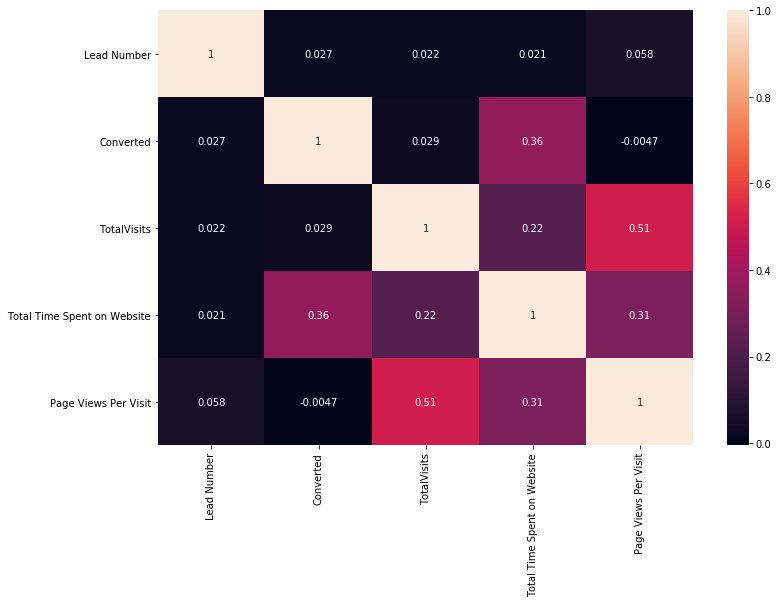

In [93]:
#Check the Correlation of numerical columns
corr = df_cleanleads.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot = True)
plt.show()

In [94]:
# Correlation value is high for TotalVisits and PageViewsPerVsisit
# Hence drop peage views per visit 
df_cleanleads = df_cleanleads.drop(['Page Views Per Visit'], axis =1)

#### Data Cleaning - Outliers treatment

In [95]:
# Check for outliers
numeric_cols = ['TotalVisits', 'Total Time Spent on Website']
num_leads = df_cleanleads[numeric_cols]
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website
count,9129.000000,9129.000000
mean,3.431482,485.669405
std,4.827994,547.488287
min,0.000000,0.000000
25%,1.000000,11.000000
50%,3.000000,247.000000
75%,5.000000,931.000000
90%,7.000000,1379.000000
95%,10.000000,1561.000000
99%,17.000000,1839.720000


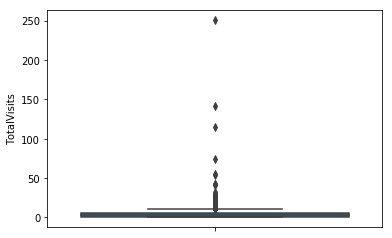

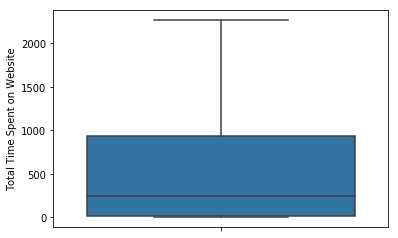

In [96]:
# Seems like there are some outliers for all the nuemrical columns
for col in numeric_cols:
    sns.boxplot(y  = col, data = df_cleanleads)
    plt.show()

In [97]:
# remove outliers for total visits
q1 = df_cleanleads.TotalVisits.quantile(0.05)
q3 = df_cleanleads.TotalVisits.quantile(0.94)
IQR = q3 - q1
df_cleanleads = df_cleanleads[(df_cleanleads.TotalVisits >= q1) & (df_cleanleads.TotalVisits <= q3)]

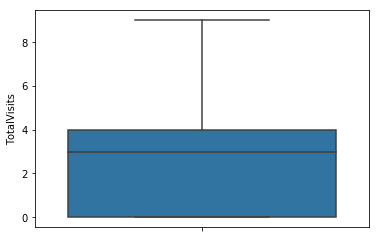

In [98]:
sns.boxplot(y  = 'TotalVisits', data = df_cleanleads)
plt.show()

## Setp4: Create Dummies

In [99]:
df_cleanleads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Last Activity', 'Specialization',
       'Occupation', 'A free copy of Mastering The Interview'],
      dtype='object')

In [100]:
# Create dummies for categorical variables
dummy1 = pd.get_dummies(df_cleanleads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','Occupation','A free copy of Mastering The Interview']], drop_first=True)

# Adding the results to the master dataframe
df_leadswithcat = pd.concat([df_cleanleads, dummy1], axis=1)

In [101]:
#drop 
df_leadswithcat.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Last Activity', 'Specialization',
       'Occupation', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Busines

In [102]:
# Drop the clolumns for variables for which dummy  variables are created 
df_leadswithcat = df_leadswithcat.drop(['Lead Origin', 'Lead Source', 'Last Activity','Specialization','Occupation','A free copy of Mastering The Interview'], axis = 1)

In [103]:
df_leadswithcat.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unspecified,Occupation_Unemployed,Occupation_Working Professional,A free copy of Mastering The Interview_Yes
count,8671.000000,8671.000000,8671.000000,8671.000000,8671.000000,8671.000000,8671.000000,8671.000000,8671.000000,8671.000000,...,8671.000000,8671.000000,8671.000000,8671.000000,8671.000000,8671.000000,8671.000000,8671.000000,8671.000000,8671.000000
mean,617083.356130,0.377926,2.813286,472.110253,0.520240,0.078076,0.005190,0.005190,0.318764,0.199746,...,0.054665,0.010495,0.007381,0.003921,0.036905,0.019836,0.375274,0.900127,0.076462,0.302041
std,23370.976833,0.484897,2.332873,543.087196,0.499619,0.268307,0.071857,0.071857,0.466024,0.399833,...,0.227338,0.101911,0.085600,0.062500,0.188539,0.139445,0.484221,0.299848,0.265751,0.459170
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596416.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,615429.000000,0.000000,3.000000,234.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,637188.500000,1.000000,4.000000,899.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,660737.000000,1.000000,9.000000,2272.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


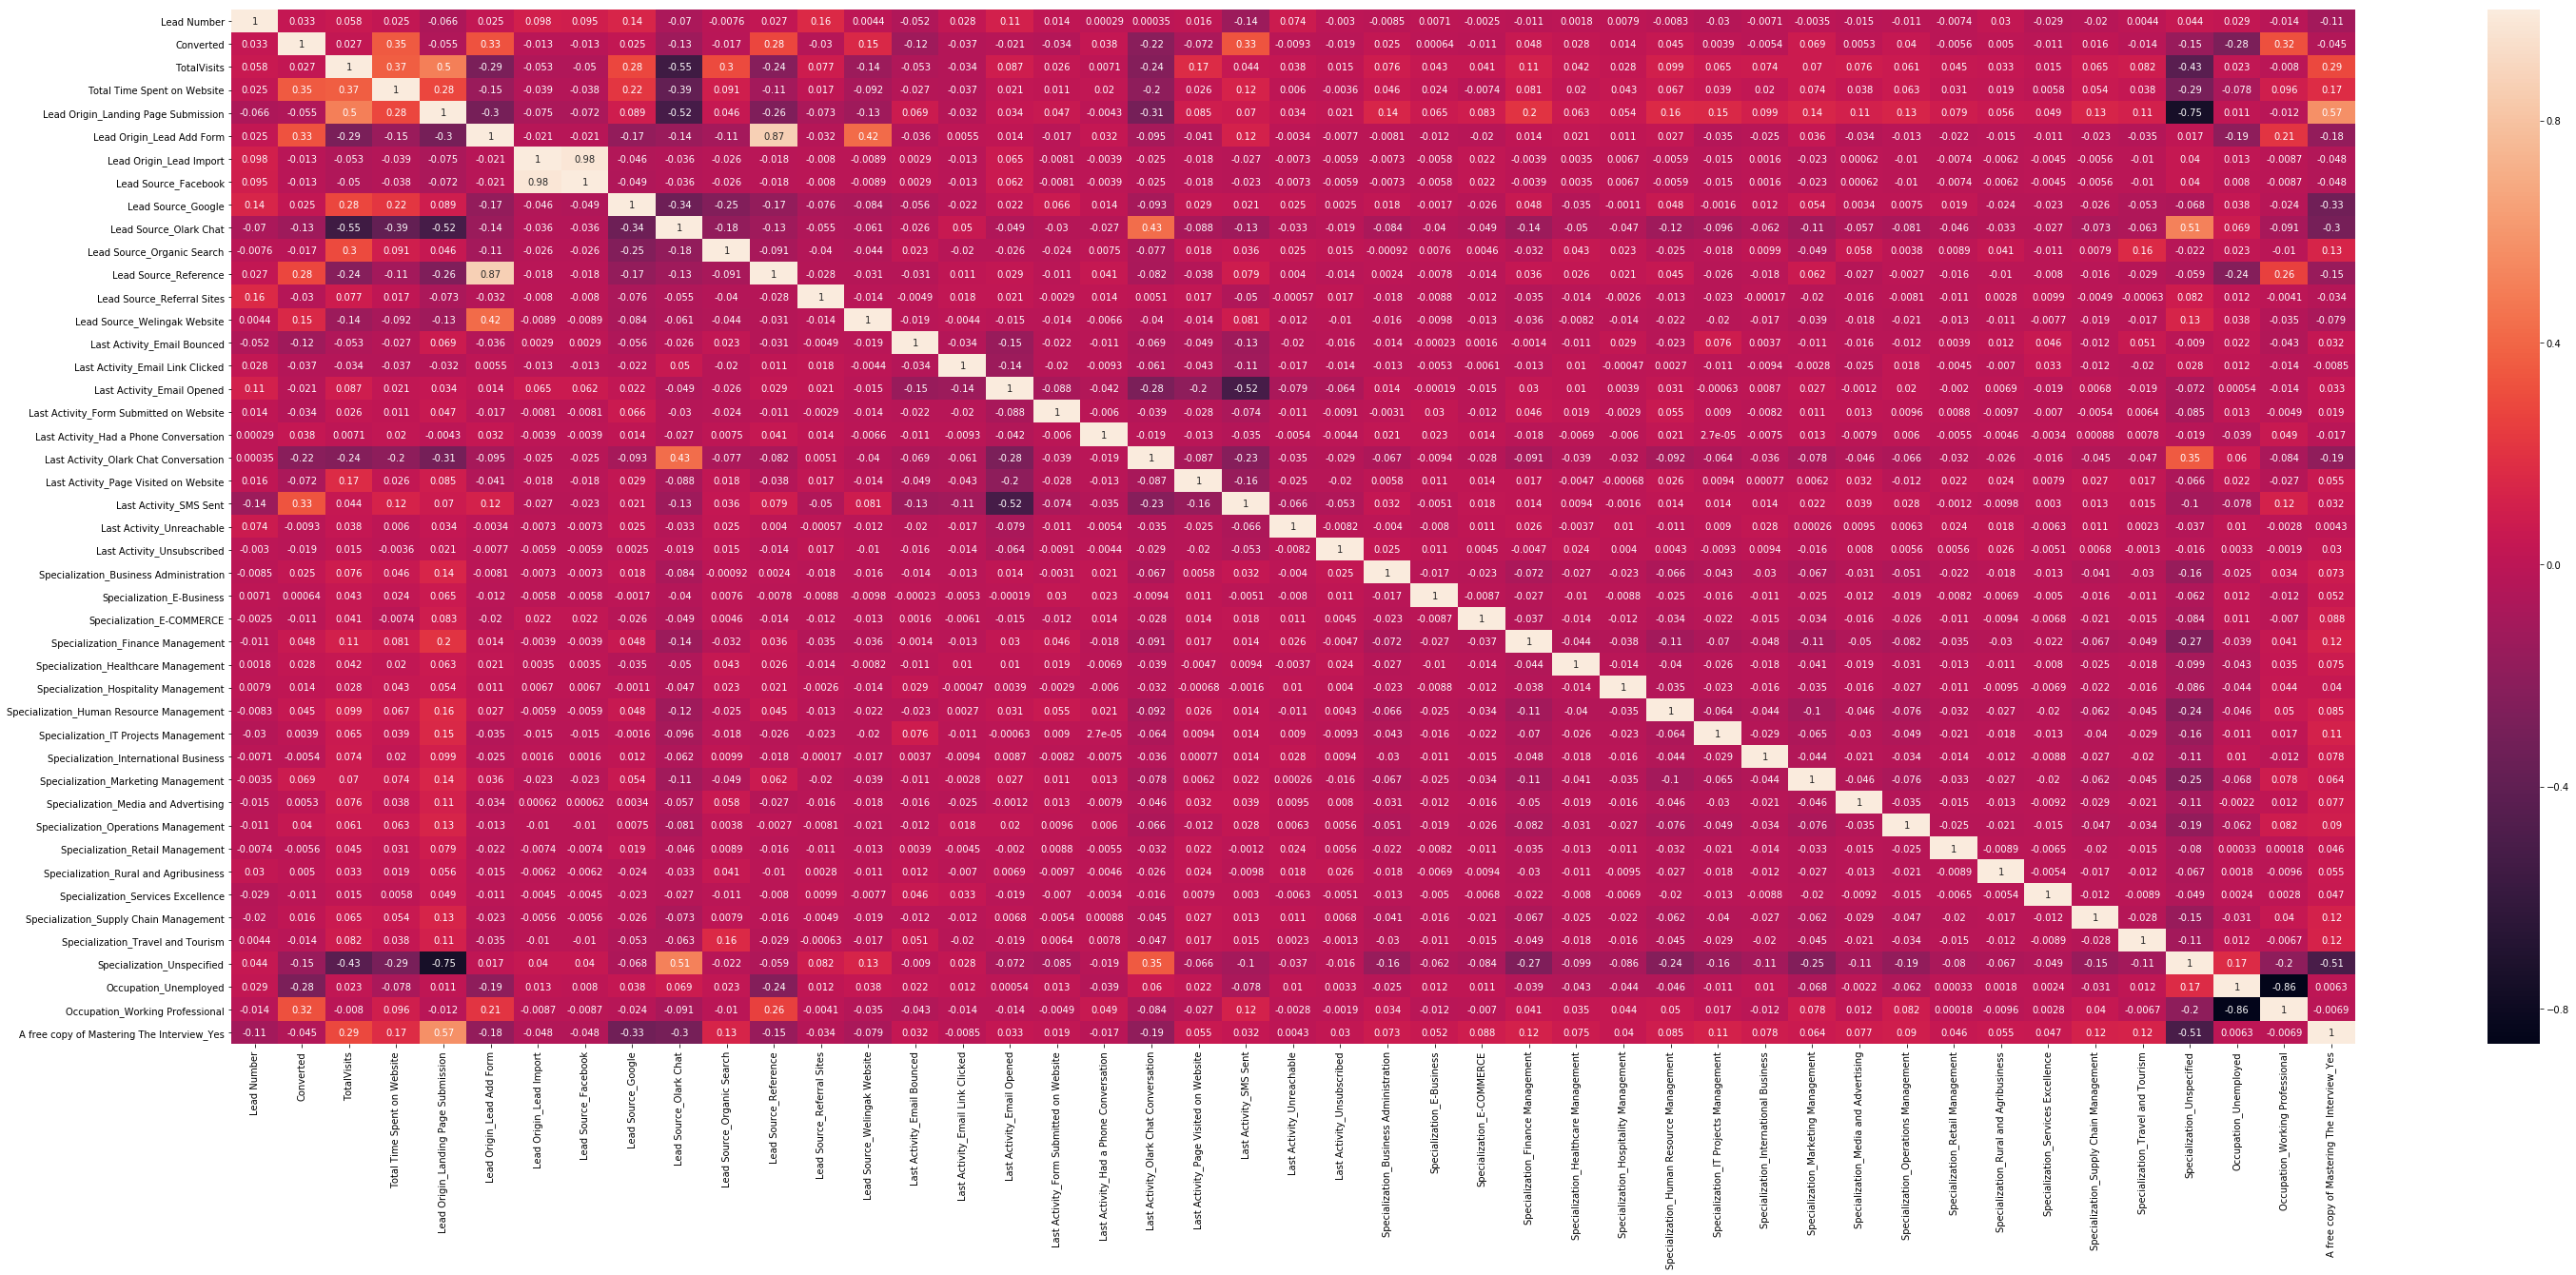

In [104]:
#Check correlated columns
corr = df_leadswithcat.corr()
plt.figure(figsize = (50,20))
sns.heatmap(corr, annot = True)
plt.show()

In [105]:
# Checking percentage of missing values after removing the missing values
round(100*(df_leadswithcat.isnull().sum()/len(df_leadswithcat.index)), 2)


Lead Number                                   0.0
Converted                                     0.0
TotalVisits                                   0.0
Total Time Spent on Website                   0.0
Lead Origin_Landing Page Submission           0.0
Lead Origin_Lead Add Form                     0.0
Lead Origin_Lead Import                       0.0
Lead Source_Facebook                          0.0
Lead Source_Google                            0.0
Lead Source_Olark Chat                        0.0
Lead Source_Organic Search                    0.0
Lead Source_Reference                         0.0
Lead Source_Referral Sites                    0.0
Lead Source_Welingak Website                  0.0
Last Activity_Email Bounced                   0.0
Last Activity_Email Link Clicked              0.0
Last Activity_Email Opened                    0.0
Last Activity_Form Submitted on Website       0.0
Last Activity_Had a Phone Conversation        0.0
Last Activity_Olark Chat Conversation         0.0


## Step 5: Train and Test Data Split

In [106]:
# model selection for train test split
from sklearn.model_selection import train_test_split

In [107]:
# Putting feature variable to X
X  = df_leadswithcat.drop('Converted', axis = 1)
X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unspecified,Occupation_Unemployed,Occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,660737,0.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
1,660728,5.0,674,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
2,660727,2.0,1532,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,660719,1.0,305,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,660681,2.0,1428,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [108]:
# Putting response  variable to y
y = df_leadswithcat['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [109]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3,random_state = 100) 

In [110]:
# create a datframe to maintain lead number inorder to merge with the final predcited df 
df_leadnumber = X_train[['Lead Number']]
df_leadnumber.head()

,Lead Number
8506,584760
3003,631017
8392,585785
7041,595656
3460,627212


In [111]:
# drop lead number
X_train = X_train.drop('Lead Number', axis = 1)

## Step 6: Feature Scaling

In [112]:
# For Scaling
from sklearn.preprocessing import StandardScaler

In [113]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website']])

In [114]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,...,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unspecified,Occupation_Unemployed,Occupation_Working Professional,A free copy of Mastering The Interview_Yes
8506,-0.339397,-0.736759,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3003,0.090175,1.626586,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
8392,-1.198541,-0.865602,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
7041,-1.198541,-0.865602,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3460,-0.339397,0.349202,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Step 7: Model Building

### Running the first stats model

In [115]:
# Import Stats model
import statsmodels.api as sm

In [116]:
#Logistic Regression Model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6069
Model:                            GLM   Df Residuals:                     6025
Model Family:                Binomial   Df Model:                           43
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2522.9
Date:                Mon, 26 Aug 2019   Deviance:                       5045.8
Time:                        22:13:22   Pearson chi2:                 7.82e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9927      0.403     -2.462      0.014      -1.783      -0.202
TotalVisits                                    0.1535      0.052      2.967      0.003       0.052       0.255
Total Time Spent on Website                    1.0581      0.041     25.675      0.000       0.977       1.139
Lead Origin_Landing Page Submission           -1.0658      0.144     -7.420      0.000      -1.347      -0.784
Lead Origin_Lead Add Form                      4.6919      1.059      4.432      0.000       2.617       6.767
Lead Origin_Lead Import                        0.9929      1.898      0.523      0.601      -2.728       4.713
Lead Source_Facebook                          -0.4428      1.896     -0.233      0.815      -4.160       3.274
Lead Source_Google                             0.0614      0.119      0.515      0.607      -0.172       0.295
Lead Source_Olark Chat                         1.4144      0.170      8.326      0.000       1.081       1.747
Lead Source_Organic Search                     0.0330      0.139      0.238      0.812      -0.239       0.305
Lead Source_Reference                         -1.3362      1.078     -1.239      0.215      -3.450       0.778
Lead Source_Referral Sites                    -0.6115      0.387     -1.580      0.114      -1.370       0.147
Lead Source_Welingak Website                   1.2116      1.286      0.942      0.346      -1.309       3.732
Last Activity_Email Bounced                   -0.8240      0.382     -2.154      0.031      -1.574      -0.074
Last Activity_Email Link Clicked               0.7620      0.299      2.545      0.011       0.175       1.349
Last Activity_Email Opened                     1.1331      0.226      5.004      0.000       0.689       1.577
Last Activity_Form Submitted on Website        0.0985      0.411      0.240      0.810      -0.707       0.904
Last Activity_Had a Phone Conversation         2.8126      0.721      3.904      0.000       1.400       4.225
Last Activity_Olark Chat Conversation         -0.7481      0.284     -2.635      0.008      -1.304      -0.192
Last Activity_Page Visited on Website          0.6051      0.273      2.214      0.027       0.070       1.141
Last Activity_SMS Sent                         2.2199      0.227      9.772      0.000       1.775       2.665
Last Activity_Unreachable                      0.8797      0.413      2.130      0.033       0.070       1.689
Last Activity_Unsubscribed                     0.5528      0.538      1.028      0.304      -0.501       1.607
Specialization_Business Administration         0.0637      0.250      0.255      0.799      -0.426       0.554
Specialization_E-Business                      0.4448      0.453      0.982      0.326      -0.443       1.332
Specialization_E-COMMERCE                     -0.1129 

## Step 8: Feature Selection Using RFE

In [117]:
# Linear model for Logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [118]:
# RFE for feature selection
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [119]:
rfe.support_

array([False,  True,  True,  True, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False,  True,  True,  True,  True, False])

In [120]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 12),
 ('Total Time Spent on Website', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Facebook', False, 14),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Reference', False, 8),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 16),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', True, 1),
 ('Last Activity_Unsubscribed', False, 2),
 ('Specialization_Business Administration', 

In [121]:
col = X_train.columns[rfe.support_]

In [122]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Lead Origin_Lead Import', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Last Activity_Form Submitted on Website',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'A free copy of Mastering The Interview_Yes'],
      dtype='object')

##### Assessing the model with StatsModels

In [123]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6069
Model:                            GLM   Df Residuals:                     6048
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2537.7
Date:                Mon, 26 Aug 2019   Deviance:                       5075.3
Time:                        22:13:23   Pearson chi2:                 7.92e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.8611      0.314     -2.745      0.006      -1.476      -0.246
Total Time Spent on Website                1.0590      0.041     25.972      0.000       0.979       1.139
Lead Origin_Landing Page Submission       -1.1707      0.134     -8.766      0.000      -1.433      -0.909
Lead Origin_Lead Add Form                  3.1716      0.222     14.261      0.000       2.736       3.607
Lead Source_Olark Chat                     1.1432      0.125      9.143      0.000       0.898       1.388
Lead Source_Referral Sites                -0.6161      0.374     -1.649      0.099      -1.349       0.116
Lead Source_Welingak Website               2.4540      0.760      3.228      0.001       0.964       3.944
Last Activity_Email Bounced               -0.8464      0.355     -2.386      0.017      -1.542      -0.151
Last Activity_Email Link Clicked           0.7592      0.263      2.885      0.004       0.243       1.275
Last Activity_Email Opened                 1.1434      0.178      6.439      0.000       0.795       1.491
Last Activity_Had a Phone Conversation     2.8156      0.704      3.997      0.000       1.435       4.196
Last Activity_Olark Chat Conversation     -0.7350      0.245     -3.000      0.003      -1.215      -0.255
Last Activity_Page Visited on Website      0.6613      0.231      2.867      0.004       0.209       1.113
Last Activity_SMS Sent                     2.2155      0.180     12.330      0.000       1.863       2.568
Last Activity_Unreachable                  0.9172      0.387      2.373      0.018       0.160       1.675
Specialization_Hospitality Management     -0.4856      0.323     -1.504      0.133      -1.119       0.147
Specialization_Retail Management          -0.4776      0.351     -1.360      0.174      -1.166       0.211
Specialization_Travel and Tourism         -0.5052      0.263     -1.924      0.054      -1.020       0.009
Specialization_Unspecified                -1.2749      0.128     -9.934      0.000      -1.526      -1.023
Occupation_Unemployed                     -0.4294      0.240     -1.787      0.074      -0.900       0.042
Occupation_Working Professional            2.0882      0.304      6.879      0.000       1.493       2.683
==========================================================================================================
"""

In [124]:
# Create predicted final data model for y_train
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ProspectID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID
8506,0,0.263852,8506
3003,0,0.814077,3003
8392,1,0.469181,8392
7041,0,0.469181,7041
3460,0,0.279272,3460


#### Checking VIFs

In [125]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

#### Write required functions

- To Check VIFs
- To Create GLM Model
- To CalculateAcuracy

These methods are useful to iterate the model creation and checking the stats

In [126]:
# Method to calculate the VIFs of each column in the train dataset
def CheckVIFs(col):
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

# Method to Create logistic regression model with given dataset and print the summary of stats
def RunGLMModel(col):
    X_train_sm = sm.add_constant(X_train[col])
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()
    print(res.summary())
    return res

# Method to calcuate and print the accuracy
def PredictandCalculateAccuracy(conv_prob_threshold):
    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    y_train_pred_final['Converted_Prob'] = y_train_pred
    y_train_pred_final['ProspectID'] = y_train.index
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > conv_prob_threshold else 0)
    print('Accuracy Score =' ,metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
    
# Method to evaluate the model. It will create the GLM model, print the VIFs of each column, and calcuate the accuracy
def EvaluateModel(col, conv_prob_threshold):
    res = RunGLMModel(col)
    print('------------------------------------------------------------------------------------')    
    CheckVIFs(col) 
    print('------------------------------------------------------------------------------------\n')      
    PredictandCalculateAccuracy(conv_prob_threshold)   
    return res


In [127]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
CheckVIFs(col)

                                  Features    VIF
18                   Occupation_Unemployed  15.36
1      Lead Origin_Landing Page Submission   6.14
8               Last Activity_Email Opened   5.74
12                  Last Activity_SMS Sent   4.95
17              Specialization_Unspecified   4.33
10   Last Activity_Olark Chat Conversation   2.78
3                   Lead Source_Olark Chat   2.50
19         Occupation_Working Professional   2.22
2                Lead Origin_Lead Add Form   1.93
11   Last Activity_Page Visited on Website   1.68
6              Last Activity_Email Bounced   1.46
7         Last Activity_Email Link Clicked   1.38
0              Total Time Spent on Website   1.31
5             Lead Source_Welingak Website   1.28
13               Last Activity_Unreachable   1.12
4               Lead Source_Referral Sites   1.05
9   Last Activity_Had a Phone Conversation   1.04
16       Specialization_Travel and Tourism   1.04
14   Specialization_Hospitality Management   1.02


##### Inference
There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'Occupation_unemployed' has the highest VIF and high P-Value(0.074) i.e. >0.05. So let's start by dropping that.

In [128]:
# Let's re-run the model using the selected variables
conv_prob_threshold = 0.5
EvaluateModel(col, conv_prob_threshold)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6069
Model:                            GLM   Df Residuals:                     6048
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2537.7
Date:                Mon, 26 Aug 2019   Deviance:                       5075.3
Time:                        22:13:23   Pearson chi2:                 7.92e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.8611      0.314     -2.745    

Model accuracy score is 80%

In [129]:
#Occupation_Unemployed
# VIFs are < 3 so we can go ahead and drop columns with high VIF and P-Value i.e. Occupation_Unemployed
col = col.drop('Occupation_Unemployed', 1)
col


Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Specialization_Hospitality Management',
       'Specialization_Retail Management', 'Specialization_Travel and Tourism',
       'Specialization_Unspecified', 'Occupation_Working Professional'],
      dtype='object')

In [130]:
# Let's re-run the model and checkVIFs using the selected variables
EvaluateModel(col, conv_prob_threshold)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6069
Model:                            GLM   Df Residuals:                     6049
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2539.2
Date:                Mon, 26 Aug 2019   Deviance:                       5078.4
Time:                        22:13:24   Pearson chi2:                 7.93e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.2883      0.203     -6.347    

Model accuracy score doesn't drop

In [131]:
# VIFs are < 3 so we can go ahead and drop columns with high P-Value i.e. Specialization_Retail Management
col = col.drop('Specialization_Retail Management', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Specialization_Hospitality Management',
       'Specialization_Travel and Tourism', 'Specialization_Unspecified',
       'Occupation_Working Professional'],
      dtype='object')

In [132]:
# Let's re-run the model and checkVIFs using the selected variables
EvaluateModel(col, conv_prob_threshold)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6069
Model:                            GLM   Df Residuals:                     6050
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.2
Date:                Mon, 26 Aug 2019   Deviance:                       5080.3
Time:                        22:13:24   Pearson chi2:                 7.95e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.2956      0.203     -6.386    

Model accuracy score didn't drop

In [133]:
# one of the VIFs are > 3 so we can go ahead and drop column with high VIF Value i.e. Lead Origin_Landing Page Submission
col = col.drop('Lead Origin_Landing Page Submission', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Specialization_Hospitality Management',
       'Specialization_Travel and Tourism', 'Specialization_Unspecified',
       'Occupation_Working Professional'],
      dtype='object')

In [134]:
# Let's re-run the model and check VIFs using the remaining variables
EvaluateModel(col, conv_prob_threshold)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6069
Model:                            GLM   Df Residuals:                     6051
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2579.8
Date:                Mon, 26 Aug 2019   Deviance:                       5159.6
Time:                        22:13:24   Pearson chi2:                 7.50e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.2696      0.171    -13.294    

Model accuracy score didn't drop

In [135]:
# VIFs are < 3 so we can go ahead and drop columns with high VIF i.e. Lead Origin_Landing Page Submission
col = col.drop('Lead Source_Referral Sites', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Specialization_Hospitality Management',
       'Specialization_Travel and Tourism', 'Specialization_Unspecified',
       'Occupation_Working Professional'],
      dtype='object')

In [136]:
# Let's re-run the model and Chekc VIFs using the remaining variables
EvaluateModel(col, conv_prob_threshold)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6069
Model:                            GLM   Df Residuals:                     6052
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2580.4
Date:                Mon, 26 Aug 2019   Deviance:                       5160.8
Time:                        22:13:24   Pearson chi2:                 7.51e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.2729      0.171    -13.321    

Model accuracy score didn't drop

In [137]:
# VIFs are < 3 so we can go ahead and drop columns with high VIF i.e. Lead Origin_Landing Page Submission
col = col.drop('Specialization_Hospitality Management', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Specialization_Travel and Tourism',
       'Specialization_Unspecified', 'Occupation_Working Professional'],
      dtype='object')

In [138]:
# Let's re-run the model and Chekc VIFs using the remaining variables
res = EvaluateModel(col, conv_prob_threshold)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6069
Model:                            GLM   Df Residuals:                     6053
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2581.2
Date:                Mon, 26 Aug 2019   Deviance:                       5162.4
Time:                        22:13:24   Pearson chi2:                 7.49e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.2824      0.171    -13.380    

Model accuracy score didn't drop = 80%.

All VIF values are less than 3

All p values are almost less than 0.05

We can consider this as the resulted model

In [139]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3361,  402],
       [ 772, 1534]], dtype=int64)

In [140]:
# Actual/Predicted      not_converted    converted
        # not_converted        3455      172
        # converted             278     1963  

In [141]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8065579172845608

#### Metrics beyond simply accuracy

In [142]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [143]:
# Let's see the sensitivity of our logistic regression model
print('sensitivity = ',TP / float(TP+FN))

sensitivity =  0.6652211621856028


In [144]:
# Let us calculate specificity
print('specificity = ',TN / float(TN+FP))

specificity =  0.8931703428115865


In [145]:
# Calculate false postive rate - predicting converted when customer does not have converted
print('false postive rate = ',FP/ float(TN+FP))

false postive rate =  0.1068296571884135


## Step 9: Plotting ROC Curve

In [146]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [147]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

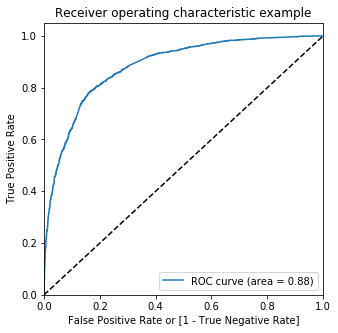

In [148]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

ROC curve looks good. The are under the curve is more and tries to reach the 0.8 at bend

## Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [149]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
8506,0,0.263852,8506,0,1,1,1,0,0,0,0,0,0,0
3003,0,0.814077,3003,1,1,1,1,1,1,1,1,1,1,0
8392,1,0.469181,8392,0,1,1,1,1,1,0,0,0,0,0
7041,0,0.469181,7041,0,1,1,1,1,1,0,0,0,0,0
3460,0,0.279272,3460,0,1,1,1,0,0,0,0,0,0,0


In [150]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379964  1.000000  0.000000
0.1   0.1  0.594497  0.979185  0.358756
0.2   0.2  0.728950  0.925846  0.608291
0.3   0.3  0.795353  0.833478  0.771990
0.4   0.4  0.817268  0.772333  0.844805
0.5   0.5  0.806558  0.665221  0.893170
0.6   0.6  0.795848  0.593235  0.920011
0.7   0.7  0.779371  0.501735  0.949508
0.8   0.8  0.751030  0.392888  0.970502
0.9   0.9  0.707365  0.245880  0.990167


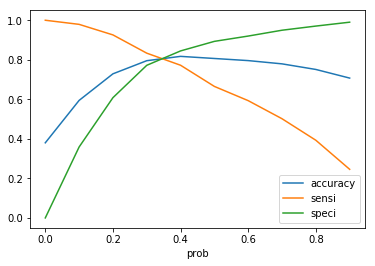

In [151]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [152]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
8506,0,0.263852,8506,0,1,1,1,0,0,0,0,0,0,0,0
3003,0,0.814077,3003,1,1,1,1,1,1,1,1,1,1,0,1
8392,1,0.469181,8392,0,1,1,1,1,1,0,0,0,0,0,1
7041,0,0.469181,7041,0,1,1,1,1,1,0,0,0,0,0,1
3460,0,0.279272,3460,0,1,1,1,0,0,0,0,0,0,0,0


In [153]:
# Create a data frame having lead scores after merging df_leadnumber and y_train_pred_final[['Converted_Prob']] 
# we will get lead score for each lead
df_trainleadscore = pd.merge(df_leadnumber, y_train_pred_final[['Converted','Converted_Prob']], left_index=True,right_index=True)
df_trainleadscore['Lead_Score'] = df_trainleadscore['Converted_Prob'] * 100
df_trainleadscore.head()

,Lead Number,Converted,Converted_Prob,Lead_Score
8506,584760,0,0.263852,26.385166
3003,631017,0,0.814077,81.407737
8392,585785,1,0.469181,46.918083
7041,595656,0,0.469181,46.918083
3460,627212,0,0.279272,27.927157


In [154]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8091942659416708

In [155]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3061,  702],
       [ 456, 1850]], dtype=int64)

In [156]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [157]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8022549869904597

In [158]:
# Let us calculate specificity
TN / float(TN+FP)

0.8134467180441137

In [159]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18655328195588627


In [160]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7249216300940439


In [161]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8703440432186522


### Precision and recall tradeoff

Some industries use Precision and reacall values instead of sensitivity and specificity. Either of them is fine.

We can get the trade off value eaven from precision-recall graph

In [162]:
from sklearn.metrics import precision_recall_curve

In [163]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

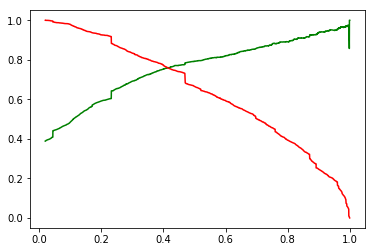

In [164]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Inference
Precision and tradeoff curve has given the cutoff value as 0.4

### Step 11: Making predictions on the test set

In [165]:
# create a datframe to maintain lead number inorder to merge with the final predcited df 
df_leadnumber = X_test[['Lead Number']]
df_leadnumber.head()

,Lead Number
477,655323
2567,634857
739,652787
7024,595759
1650,643227


In [166]:
# drop lead number
X_test = X_test.drop('Lead Number', axis = 1)

In [167]:
X_test[['TotalVisits','Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website']])

In [168]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Travel and Tourism,Specialization_Unspecified,Occupation_Working Professional
477,-0.466189,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2567,1.037591,0,0,0,0,0,0,0,0,0,0,0,0,0,0
739,2.381237,1,0,0,0,0,1,0,0,0,0,0,0,0,0
7024,-0.865602,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1650,-0.460667,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [169]:
X_test_sm = sm.add_constant(X_test)

Making Predictions on the test set

In [170]:
y_test_pred = res.predict(X_test_sm)

In [171]:
y_test_pred[:10]

477     0.340455
2567    0.239114
739     0.994754
7024    0.257075
1650    0.018025
2030    0.053088
1476    0.153803
1876    0.074403
2635    0.026248
2291    0.124716
dtype: float64

In [172]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [173]:
# Let's see the head
y_pred_1.head()

,0
477,0.340455
2567,0.239114
739,0.994754
7024,0.257075
1650,0.018025


In [174]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [175]:
# Putting CustID to index
y_test_df['ProspectID'] = y_test_df.index

In [176]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [177]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [178]:
y_pred_final.head()

,Converted,ProspectID,0
0,0,477,0.340455
1,0,2567,0.239114
2,1,739,0.994754
3,0,7024,0.257075
4,0,1650,0.018025


In [179]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [180]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ProspectID','Converted','Converted_Prob'], axis=1)

In [181]:
# Let's see the head of y_pred_final
y_pred_final.head()

,ProspectID,Converted,Converted_Prob
0,477,0,0.340455
1,2567,0,0.239114
2,739,1,0.994754
3,7024,0,0.257075
4,1650,0,0.018025


In [182]:
# Calculate the final predicted value using the threshold value obatined from ROC curve which is 0.35
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [183]:
y_pred_final.head()

,ProspectID,Converted,Converted_Prob,final_predicted
0,477,0,0.340455,0
1,2567,0,0.239114,0
2,739,1,0.994754,1
3,7024,0,0.257075,0
4,1650,0,0.018025,0


In [184]:
# Create a data frame having lead scores after merging df_leadnumber and y_train_pred_final[['Converted_Prob']] 
# we will get lead score for each lead
df_testleadscore = pd.merge(df_leadnumber, y_pred_final[['Converted','Converted_Prob']], left_index=True,right_index=True)
df_testleadscore['Lead_Score'] = df_testleadscore['Converted_Prob'] * 100
df_testleadscore.head()

,Lead Number,Converted,Converted_Prob,Lead_Score
477,655323,1,0.808737,80.873700
2567,634857,0,0.755941,75.594053
739,652787,1,0.676825,67.682488
1650,643227,0,0.277564,27.756383
2030,640041,1,0.887591,88.759097


In [185]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8132205995388163

#### Inference
model accuracy on test dataset (0.80) is almost same as the train dataset (0.81). So created model is good to go

In [186]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1323,  308],
       [ 178,  793]], dtype=int64)

In [187]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [188]:
# Calculate the sensitivity of our logistic regression model on the test data
TP / float(TP+FN)

0.8166838311019567

In [189]:
# Calculate specificity
TN / float(TN+FP)

0.8111587982832618

#### Lead Scores for all the leads in the data frame

In [190]:
# Create a data frame having lead scores for all the leads given the data set
# we will get lead score for each lead
df_leadscore = pd.concat([df_trainleadscore, df_testleadscore])
df_leadscore = df_leadscore[['Lead Number','Converted','Lead_Score']]
df_leadscore.head()

,Lead Number,Converted,Lead_Score
8506,584760,0,26.385166
3003,631017,0,81.407737
8392,585785,1,46.918083
7041,595656,0,46.918083
3460,627212,0,27.927157


### Odds ratio

In [191]:
# Top 3 important variables for lead conversion
# Higher value indicates an increase in the odds, i.e. an increase in the likely hood of a lead getting converted
model_odds = pd.DataFrame(np.exp(res.params), columns= ['OddsRatio'])
model_odds.sort_values(by = 'OddsRatio', ascending = False)

,OddsRatio
Lead Origin_Lead Add Form,47.054632
Last Activity_Had a Phone Conversation,16.093814
Occupation_Working Professional,13.006860
Last Activity_SMS Sent,8.385207
Lead Source_Welingak Website,8.092998
Lead Source_Olark Chat,4.737403
Last Activity_Email Opened,2.988081
Total Time Spent on Website,2.956675
Last Activity_Unreachable,2.232886
Last Activity_Email Link Clicked,2.054933


#### Top three variables in the model which contribute most towards the probability of a lead getting converted
- Lead Origin_Lead Add Form
- Last Activity_Had a Phone Conversation
- Occupation_Working Professional

#### Top three categorical variables in the model which contribute most towards the probability of a lead getting converted
- Lead Origin
- Last Activity
- What is your Occupation